In [43]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns
from datetime import datetime
from config import consumer_key, API_secret, access_token, token_secret

In [46]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [53]:
# Target Account
target_users = ["@amazon", "@facebook", "@Microsoft"]
sentiments = []


for target_user in target_users:
    counter = 1

#loop through 5 pages of tweets - 100 total for each news outlet
    for x in range(5):
        
        public_tweets = api.user_timeline(target_user, page=x+1)
        
        #loop though tweets
        for tweet in public_tweets:
            
            #run vader analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            tweets_ago = counter
            
            sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter,
                            "Company Name" : target_user})
            
            counter = counter+1

In [54]:
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.tail()

,Company Name,Compound,Date,Negative,Neutral,Positive,Tweets Ago
295,@Microsoft,0.3612,Tue Mar 06 01:05:52 +0000 2018,0.839,0.000,0.161,96
296,@Microsoft,0.7430,Mon Mar 05 22:17:03 +0000 2018,0.751,0.000,0.249,97
297,@Microsoft,0.6880,Mon Mar 05 21:35:56 +0000 2018,0.779,0.000,0.221,98
298,@Microsoft,0.0258,Mon Mar 05 20:35:48 +0000 2018,0.758,0.118,0.123,99
299,@Microsoft,-0.5106,Mon Mar 05 18:29:12 +0000 2018,0.875,0.125,0.000,100


In [63]:
date_pd = sentiments_pd.groupby(["Company Name"])["Compound"].mean()
date_pd.head()

Company Name
@Microsoft    0.341275
@amazon       0.455635
@facebook     0.183504
Name: Compound, dtype: float64

Text(0.5,1,'Tweet Sentiment over past 100 Tweets')

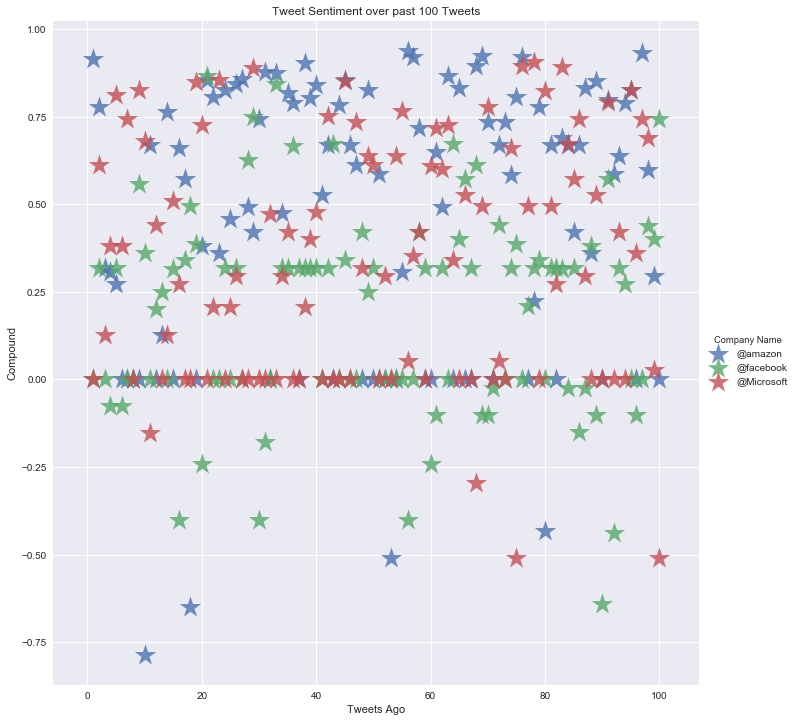

In [55]:
#create scatterplot of tweet semtiment 
sns.set()
sns.lmplot( x="Tweets Ago", y="Compound", data=sentiments_pd, fit_reg=False, markers="*", 
           size=10, hue="Company Name", legend=True, scatter_kws={"s": 500})
plt.title("Tweet Sentiment over past 100 Tweets")

In [34]:
public_tweets = api.trends_place(2378426, 5684789)
pprint(public_tweets)
#public_tweets_df = pd.DataFrame()
#public_tweets_df.head()

[{'as_of': '2018-04-03T23:28:02Z',
  'created_at': '2018-04-03T23:26:03Z',
  'locations': [{'name': 'Charlotte', 'woeid': 2378426}],
  'trends': [{'name': '#ncga',
              'promoted_content': None,
              'query': '%23ncga',
              'tweet_volume': None,
              'url': 'http://twitter.com/search?q=%23ncga'},
             {'name': '#NationalChampionship',
              'promoted_content': None,
              'query': '%23NationalChampionship',
              'tweet_volume': 84873,
              'url': 'http://twitter.com/search?q=%23NationalChampionship'},
             {'name': '#CltTraffic',
              'promoted_content': None,
              'query': '%23CltTraffic',
              'tweet_volume': None,
              'url': 'http://twitter.com/search?q=%23CltTraffic'},
             {'name': 'Villanova',
              'promoted_content': None,
              'query': 'Villanova',
              'tweet_volume': 182180,
              'url': 'http://twitter.com/sear

In [36]:
public_tweets1 = api.followers("@ferrari")
public_tweets1

{'next_cursor': 1596765986824715112,
 'next_cursor_str': '1596765986824715112',
 'previous_cursor': 0,
 'previous_cursor_str': '0',
 'users': [{'blocked_by': False,
   'blocking': False,
   'contributors_enabled': False,
   'created_at': 'Tue Apr 03 23:29:26 +0000 2018',
   'default_profile': True,
   'default_profile_image': True,
   'description': '',
   'entities': {'description': {'urls': []}},
   'favourites_count': 0,
   'follow_request_sent': False,
   'followers_count': 0,
   'following': False,
   'friends_count': 81,
   'geo_enabled': False,
   'has_extended_profile': False,
   'id': 981312752248639488,
   'id_str': '981312752248639488',
   'is_translation_enabled': False,
   'is_translator': False,
   'lang': 'en',
   'listed_count': 0,
   'live_following': False,
   'location': '',
   'muting': False,
   'name': 'Javier',
   'notifications': False,
   'profile_background_color': 'F5F8FA',
   'profile_background_image_url': None,
   'profile_background_image_url_https': None